# Machine Learning Basics : Part-2

### Welcome to the 2nd Lab of 42028: Deep Learning and CNN!

In the 2nd part of this week's Lab/Tutorial session you will be implementing a K-NN and a SVM classifier for classification!

So lets get started!

## Task for this week:

1. Train and test a KNN classifier 
2. Train and test a SVM classifier

# Scikit-Learn

Scikit-learn is a Python-based machine learning library which includes implementation of various supervised and unsupervised algorithms. This library uses Numpy and SciPy at the backend for numerical and scientific computations.

In [0]:
"""
Import the required libraries
"""
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
# importing a module for splitting a dataset into train, and test
from sklearn.model_selection import train_test_split
# import Knn classifier
from sklearn.neighbors import KNeighborsClassifier
# confusion metric
from sklearn import metrics

In [31]:
# Install mglearn library
!pip install mglearn
import mglearn

## K-Nearest Neighbors Classification

**Recap:**
* A simple supervised learning algorithm.

* Can be used for both classification and regression

* Non-parametric: doesn’t make any assumption on the data distribution

* Training data is retained to make future predictions 

**How does it work?**
1. Computes distance between the new sample and all training samples
2. Distance measure: Euclidean, Manhattan etc.
3. Picks ‘k’ entries in the training set which are closest to the new sample
4. Majority voting decides the class of the new sample


<img src='http://drive.google.com/uc?export=view&id=1R7MSX-8V6SIwSD-_AgkN1als9hAKXSa7' alt='KNN'>

Quick Reference: https://scikit-learn.org/stable/modules/neighbors.html 

Image Source: https://towardsdatascience.com/knn-using-scikit-learn-c6bed765be75

Let's take an example of a synthetic two-classification dataset called  **forge dataset** which is provided with the **mglearn** library. The dataset has two features as shown in the following scatter plot.

In [32]:
## Load the forge dataset dataset from mglearn library
X,y = mglearn.datasets.make_forge()
## print the shape of the dataset
print(X.shape)
print(y.shape)

(26, 2)
(26,)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


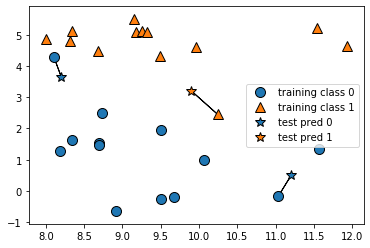

In [33]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


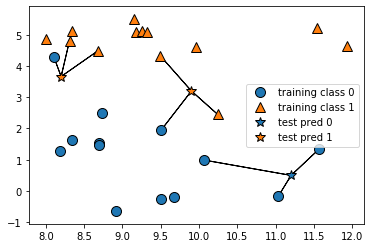

In [34]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

### Step-1: Create the training and test dataset

In [0]:
# Divided the dataset into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

### Step-2: Create an instance of a K-NN model with 3 NNs

In [0]:
# Create an instance of a k-NN model with 3 nearest neighbors
clf=KNeighborsClassifier(n_neighbors=3)

### Step-3: Fit the model with training data

In [37]:
# Fit the model, clf, to the training set.
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

### Step-4: Make a prediction on the test dataset

In [38]:
# Calculate the predictions for y_test with the clf model
y_predicted=clf.predict(X_test)
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


In [39]:
y_test

array([1, 0, 1, 0, 1, 1, 0])

### Step-5: Compute the accuracy of the K-NN Model

In [40]:
print("Test set Accuracy: {:.2f}".format(clf.score(X_test,y_test)))

Test set Accuracy: 0.86


In [41]:
print(metrics.confusion_matrix(y_test, y_predicted))

[[3 0]
 [1 3]]


## Analyzing KNeighbors Classifier for better understanding

Lets plot the K-NN decision bourndaris using different values of K, such as 1, 3 , 5 and 9, for better understanding.

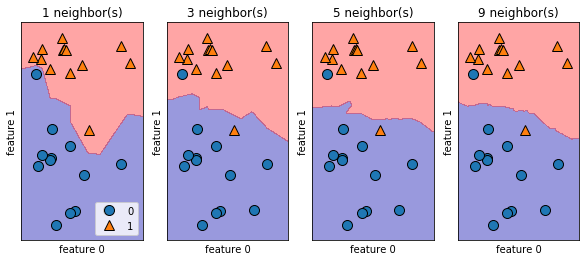

In [42]:
fig, axes = plt.subplots(1, 4, figsize=(10, 4))

for n_neighbors, ax in zip([1, 3, 5, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=4)

## Task 1: Train and Test a KNN classifier on Breast Cancer dataset

The Breast Cancer dataset contains clinical measurements of breast cancer tumor. The tumor is either "Benign(harmless)" or "Malignant (harmful)." The task is to train the classifier to predict a class (Benign Vs. Malignant ) for tumor based on its measurement. This dataset contains 569 examples, each with 30 features.

Complete the code given below:




In [43]:
# import a breast cancer dataset
from sklearn.datasets import load_breast_cancer
# load the dataset similar to the example above
cancer= load_breast_cancer()

# Examin the keys of the loaded cancer dataset

cancer.keys()

# print the shape of the data
cancer.data.shape

# how many are malignant and how many are benign

print("Sample counts for class:\n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

### START YOUR CODE FROM HERE ###
## 1. Split the dataset into train and test sets (~ 1 line)
## Hint: use train_test_split()
X_train, X_test, y_train, y_test = train_test_split( cancer.data, cancer.target, random_state=66)

## 2. build the model(~ 2 line)
## 2.1 Create an instance of the KNN classifier with k=3
clf = KNeighborsClassifier(n_neighbors=3)

## 2.2 Fit the model to the training dataset
clf.fit(X_train, y_train)

## 3. Calculate the train set accuracy (~ 1 line)
## Hint use clf.score()
acc_train = clf.score(X_train, y_train)
print('Train set accuracy: ', acc_train)


## 4. Calculate the test set accuracy  (~ 1 line)
## Hint use clf.score()
acc_test = clf.score(X_test, y_test)
print('Test set accuracy: ', acc_test)

### END OF CODE ###

Sample counts for class:
{'malignant': 212, 'benign': 357}
Train set accuracy:  0.9671361502347418
Test set accuracy:  0.9230769230769231


In [44]:
y_test

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1])

# Linear SVM Vs. Logistic Regression

**Goal:** Given a binary classification problem, the goal to fit the best line to the training data and have a maximum probability of classifying unseen data. 

There are two most common algorithms for  classification namely Logistic Regression and Support Vector Machines (SVM). Both these algorithms are implemented in  linear_model.LogisticRegression and svm.LinearSVC respectively. 

In logistic regression, we take the output of the linear function and squash the value within the range of [0,1] using the sigmoid function( logistic function). The Sigmoid-Function is an S-shaped curve that can take any real-valued number and map it into a value between the range of 0 and 1, but never exactly at those limits. Typically, if the squashed value is greater than a threshold value we assign it a label 1, else we assign it a label 0. This justifies the name ‘logistic regression’.
Note that the difference between logistic and linear regression is that Logistic regression gives you a discrete outcome but linear regression gives a continuous outcome.

**Note:** Logistic regression is a classification algorithm and it should not be confused with Linear regression.

**Reference**: https://towardsdatascience.com/support-vector-machine-vs-logistic-regression-94cc2975433f


### Example-1: Train and test Linear SVM and Logistic Regression on Forge Dataset


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


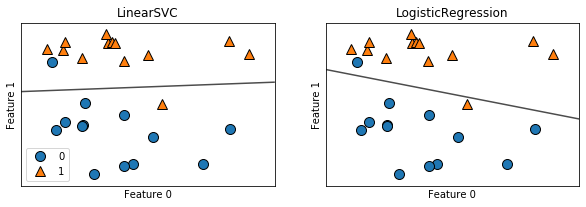

In [45]:
## Import the library for Logistic Regression and Linear SVM
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

## Load the forge dataset from mglearn library
X, y = mglearn.datasets.make_forge()

## Create subplot for displaying the resuls
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

## Create model for Linear SVM and Logistic Regression
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

Both the model uses L2 regularization. The trade-off parameter C determine the strength of the regularization. A higher level of C corresponds to less regularizations

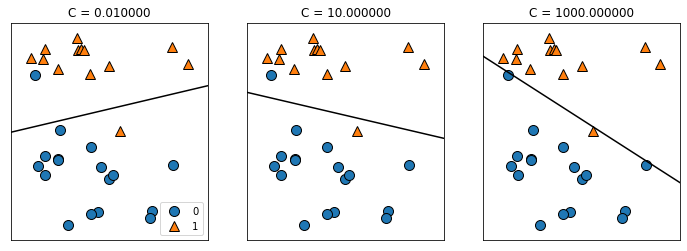

In [46]:
mglearn.plots.plot_linear_svc_regularization()

### Example-2: Train and test a Logistic regression on Breast Cancer Dataset

In [47]:
## Apply Logistic Regression on Breast Cancer Dataset
## 1. Load the dataset
cancer = load_breast_cancer()

## 2. Create train and test datasets
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=42)

## 3. Create a Logistic Regression classifier
logreg = LogisticRegression().fit(X_train, y_train)

## 4. Evaluate the accuracy of the trained model
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.946
Test set score: 0.965


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Task 2. Apply SVM with linear kernel to the breast cancer dataset.

In [48]:
## Load and display the features of the Breast Cancer Dataset
cancer = load_breast_cancer()

print("Features: ", cancer.feature_names)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [49]:
## Display the target labels
print("Labels: ", cancer.target_names)

Labels:  ['malignant' 'benign']


In [50]:
# print the cancer data features (top 5 records)
#
print(cancer.data[0:5])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

In [51]:
print(cancer.target[0:5])

[0 0 0 0 0]


In [0]:
## START YOUR FROM HERE ## 
# 1. Split the dataset in to 30 percent testing and 70 percent training data (~ 1 line)

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109) # 70% training and 30% test
## END YOUR CODE ## 

In [53]:
## START YOUR FROM HERE ## 
#Import svm model
from sklearn import svm

## 2. Create a svm Classifier (~1 line)
## Hint: use svm.SVC, with kernel parameter as 'linear'
clf = svm.SVC(kernel='linear') # Linear Kernel

## 3. Train the model using the training sets (~ 1 line)
## Hint: use clf.fit()
clf.fit(X_train, y_train)

## 4. Predict the response for test dataset (~ 1 line)
## Hint: use clf.predict()
y_pred = clf.predict(X_test)

## END YOUR CODE ##

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9649122807017544


In [54]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9811320754716981
Recall: 0.9629629629629629


# Introduction to Tensorflow

TensorFlow is a library developed by the Google Brain Team to accelerate machine learning and deep neural network research.
In Tensorflow, all the computations involve tensors. A tensor is a vector or matrix of n-dimensions that represents all types of data. In TensorFlow, all the operations are conducted inside a graph. The graph is a set of computation that takes place successively. Each operation is called an op node and are connected to each other.


Let 's define the X_1 and X_2 input nodes. When we create a node in Tensorflow, we have to choose what kind of node to create. The X1 and X2 nodes will be a placeholder node. The placeholder assigns a new value each time we make a calculation. 

In [0]:
# import tensorflow
import tensorflow as tf

### Step 1: Define the variables.

In [0]:
X_1 = tf.placeholder(tf.float32, name = "X_1")
X_2 = tf.placeholder(tf.float32, name = "X_2")

### Step 2: Define the computation

In [0]:
multiply = tf.multiply(X_1, X_2, name = "multiply")

### Step 3: Execute the operation

In [58]:
with tf.Session() as session:
    result = session.run(multiply, feed_dict={X_1:[1,2,3], X_2:[4,5,6]})
    print(result)

[ 4. 10. 18.]
